In [1]:
import numpy as np
import pandas as pd

In [2]:
df = pd.read_csv("weatherHistory.csv",usecols = [2,3,4,5,6,7,8,10])

In [3]:
df.sample(5)

,Precip Type,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Pressure (millibars)
79669,rain,33.861111,31.694444,0.19,4.5724,78,16.1000,1012.98
81262,snow,-0.283333,-2.466667,0.75,6.3273,129,13.6367,1018.86
39467,rain,12.655556,12.655556,0.96,3.8318,186,5.0876,998.69
41255,rain,14.372222,14.372222,0.93,14.0070,340,14.9086,1016.36
36988,snow,-1.522222,-8.305556,0.99,28.8351,305,3.1234,1014.37


In [4]:
df[df["Precip Type"] =="CloudBurst"] 

,Precip Type,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Pressure (millibars)


In [5]:
df[df["Precip Type"] =="No CloudBurst"] 

,Precip Type,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Pressure (millibars)


In [6]:
import seaborn as sns
import matplotlib.pyplot as plt


<Axes: xlabel='Pressure (millibars)', ylabel='Density'>

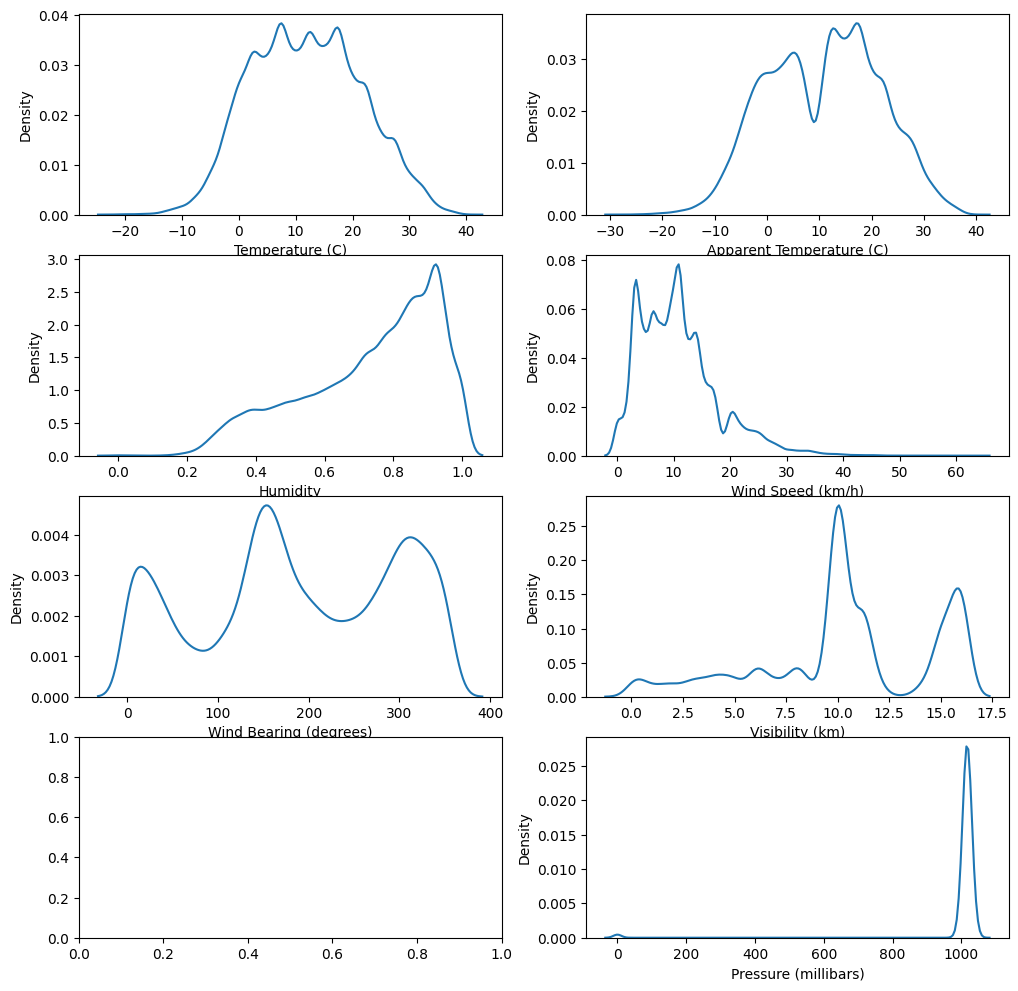

In [7]:
fig,axs = plt.subplots(4,2,figsize=(12,12))
sns.kdeplot(x=df["Temperature (C)"],ax =axs[0,0])
sns.kdeplot(x=df["Apparent Temperature (C)"],ax =axs[0,1])
sns.kdeplot(x=df["Humidity"],ax =axs[1,0])
sns.kdeplot(x=df["Wind Speed (km/h)"],ax =axs[1,1])
sns.kdeplot(x=df["Wind Bearing (degrees)"],ax =axs[2,0])
sns.kdeplot(x=df["Visibility (km)"],ax =axs[2,1])
sns.kdeplot(x=df["Pressure (millibars)"],ax =axs[3,1])



In [12]:
df["Precip Type"].value_counts()
df.isnull().sum()

Precip Type                 0
Temperature (C)             0
Apparent Temperature (C)    0
Humidity                    0
Wind Speed (km/h)           0
Wind Bearing (degrees)      0
Visibility (km)             0
Pressure (millibars)        0
dtype: int64

In [13]:
df['Precip Type'].fillna('CloudBurst', inplace=True)

In [14]:
df.isnull().sum()

Precip Type                 0
Temperature (C)             0
Apparent Temperature (C)    0
Humidity                    0
Wind Speed (km/h)           0
Wind Bearing (degrees)      0
Visibility (km)             0
Pressure (millibars)        0
dtype: int64

In [15]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df["Precip Type"] = le.fit_transform(df["Precip Type"])

In [16]:
df["Precip Type"].value_counts()


Precip Type
1    85224
2    10712
0      517
Name: count, dtype: int64

In [17]:
x = df[["Temperature (C)","Apparent Temperature (C)","Humidity","Wind Speed (km/h)","Wind Bearing (degrees)","Visibility (km)","Pressure (millibars)"]]
y = df[["Precip Type"]]

In [18]:
from sklearn.model_selection import train_test_split

In [19]:
x_train, x_test, y_train,y_test = train_test_split(x,y,test_size = 0.2,random_state = 42)

In [20]:
from sklearn.naive_bayes import GaussianNB,MultinomialNB,BernoulliNB
from sklearn.metrics import accuracy_score,confusion_matrix,precision_score,recall_score

In [21]:
gnb = GaussianNB()
mnb = MultinomialNB()
bnb = BernoulliNB()

In [22]:
gnb.fit(x_train,y_train)
y_pred = gnb.predict(x_test)
print(accuracy_score(y_test,y_pred))
print(confusion_matrix(y_test,y_pred))
print(precision_score(y_test,y_pred,average = None))
print(recall_score(y_test,y_pred,average= None))

0.9229174226323156
[[   32    75     3]
 [  269 15661  1061]
 [    0    79  2111]]
[0.10631229 0.99026241 0.66488189]
[0.29090909 0.92172327 0.96392694]


C:\Users\Adarsh Kotawar\AppData\Roaming\Python\Python312\site-packages\sklearn\utils\validation.py:1310: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [23]:
bnb.fit(x_train,y_train)
y_pred = bnb.predict(x_test)
print(accuracy_score(y_test,y_pred))
print(confusion_matrix(y_test,y_pred))
print(precision_score(y_test,y_pred,average = None))
print(recall_score(y_test,y_pred,average= None))

0.9942978591052822
[[    0   110     0]
 [    0 16991     0]
 [    0     0  2190]]
[0.         0.99356763 1.        ]
[0. 1. 1.]


C:\Users\Adarsh Kotawar\AppData\Roaming\Python\Python312\site-packages\sklearn\utils\validation.py:1310: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Adarsh Kotawar\AppData\Roaming\Python\Python312\site-packages\sklearn\metrics\_classification.py:1517: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [24]:
h = [[-2.866667,-7.027778,0.93,11.1251,180,1.1109,1034.23]]
bnb.predict(h)

C:\Users\Adarsh Kotawar\AppData\Roaming\Python\Python312\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but BernoulliNB was fitted with feature names
  warnings.warn(


array([2])

In [25]:
import pickle 
pickle.dump(bnb,open("cbmodel.pkl","wb"))